<a href="https://colab.research.google.com/github/Didier-Lebourgeois/colab/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#COVID 19 : analyse graphique des chiffres du gouvernement


###Récupération des données sur le site du gouvernement à l'url https://www.data.gouv.fr/fr/datasets/r/6fadff46-9efd-4c53-942a-54aca783c30c et conversion en Dataframe pandas (module python pour le traitement des données)


In [ ]:
# coding: utf-8
# import de pandas pour analyser les données
import pandas as pd

In [ ]:
# import du module nécessaire pour tracer le graphique
import matplotlib.pyplot as plt

In [ ]:
# Je récupère les données Covid sur le site du gouvernement 
# dédié à l'Open Data pour les stocker dans un DataFrame Pandas
df = pd.read_csv(
    "https://www.data.gouv.fr/fr/datasets/r/6fadff46-9efd-4c53-942a-54aca783c30c",
     sep=";")

In [ ]:
# J'applique un libellé intelligible basé sur les métadonnées associées
#au fichier analysé
df.columns=["Départ.", "Date", 
            "Hospi",
            "Réa", 
            "Dc",
            "Sorties"]

In [ ]:
# Je m'intéresse aux données globales au niveau national, 
# je vais donc éliminer la colonne du département
df.drop(labels="Départ.", axis=1, inplace=True)

In [ ]:
titre = 'COVID 19 EN FRANCE - Données hospitalières au {}'.format(df['Date'].iloc[-1])
print(titre)

COVID 19 EN FRANCE - Données hospitalières au 2022-09-30


In [ ]:
# On stocke dans notre Dataframe Pandas les sommes des colonnes par jour
df = df.groupby(by="Date").sum()

##Affichage des dernières données quotidiennes publiées

In [ ]:
df.tail(1)

,Hospi,Réa,Dc,Sorties
Date,,,,
2022-09-30,835,75,30,514


In [ ]:
df.describe()

,Hospi,Réa,Dc,Sorties
count,926.000000,926.000000,926.000000,926.000000
mean,995.384449,157.838013,137.668467,823.431965
std,839.990156,140.845768,128.344659,627.857871
min,14.000000,1.000000,0.000000,5.000000
25%,285.250000,47.000000,35.000000,286.250000
50%,755.000000,117.000000,91.000000,666.000000
75%,1528.000000,227.750000,209.250000,1290.750000
max,4281.000000,771.000000,613.000000,3524.000000


##Affichage du graphique

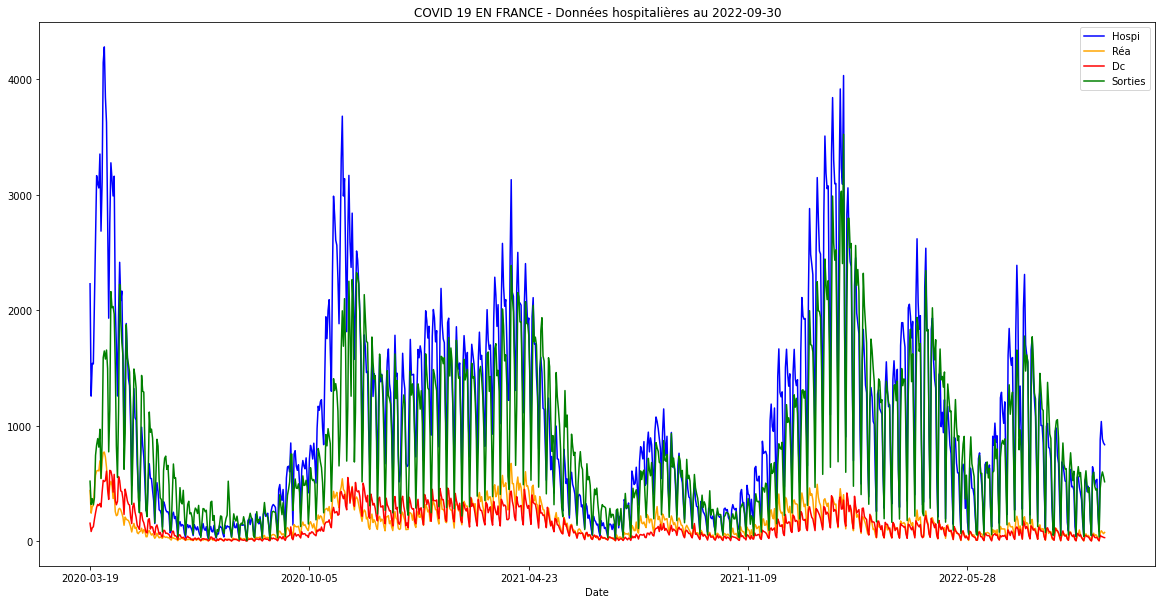

In [ ]:
ax = plt.gca()
df.plot(kind='line', y='Hospi', color='blue', ax=ax, figsize=(20,10), title=titre)
df.plot(kind='line', y='Réa', color='orange', ax=ax)
df.plot(kind='line', y='Dc', color='red', ax=ax)
df.plot(kind='line', y='Sorties', color='green', ax=ax)